<a href="https://colab.research.google.com/github/LostReny/Ocean_DeepLearning_17_09_20/blob/master/intro_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.compat.v1.keras.optimizers import RMSprop

In [ ]:
#Carregando dados de treino e teste

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [ ]:
#Quantas imagens eu tenhopara treino
print("Quantidade de imagens para treino:" ,len(x_treino)) #60000

#Quantas imagens eu tenho para teste?
print("Quantidade de imagens para teste:", len(x_teste)) #100000

#Qual o tipo de x_treino
print("tipo do x_treino;", type(x_treino))

#Pegando a primeira imagem
primeira_imagem = x_treino[0]
representacao_primeira_imagem = y_treino[0]

print("O que a imagem 0 reprenta:", representacao_primeira_imagem)
#print(primeira_imagem)

#qual o formato da primeira img?
print("formato da primeira imagem:", primeira_imagem.shape, type(primeira_imagem.shape))


Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
tipo do x_treino; <class 'numpy.ndarray'>
O que a imagem 0 reprenta: 5
formato da primeira imagem: (28, 28) <class 'tuple'>


essa imagem representa: 5


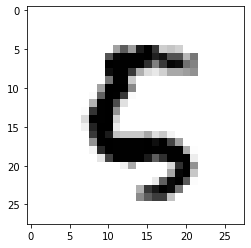

In [ ]:
#exibindo imagem

import matplotlib.pyplot as plt

indice = 2000

print("essa imagem representa:", y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary)
plt.show()

In [ ]:
#achatando as matrizes de pixels e transformando em uma unica lista

quantidade_treino = len(x_treino) #60000
quantidade_teste = len(x_teste) #10000

resolucao_imagem = x_treino[0].shape # irá trazer (28,28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)


In [ ]:
#Normalização dos dados
#255 vira 1 
#0 vira 0
#127 vira 0.5
# e assim por diante

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino/= 255
x_teste/= 255

print(type(x_treino[0][300]))
print(x_treino[0][350])

<class 'numpy.float32'>
0.27450982


In [ ]:
#visualizando dados normalizados

print("dados normalizados", x_treino[0])

dados normalizados [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

In [ ]:
# Camada de saída (output)

valores_unicos = set(y_treino)
quantidade_valores_unicos = len (valores_unicos)
                                 
print(valores_unicos)
print(quantidade_valores_unicos)

# Transformação dos valores único em variáveis categóricas
# tamanho de casa em categorias: casas pequenas, médias e grandes - variável categorica
# tamnho casa: 100m², 200m² - variável númerica

# representação categórca de um número na rede neural
# número 0 - [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# número 5 - [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

print("y_treino[0] antes:", y_treino[0])

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

print("y_treino[0] depois:", y_treino[0])


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10
y_treino[0] antes: 5
y_treino[0] depois: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Criar o modelo da rede neural

model = Sequential()

#Primeira hidden layer com 30 neurônios e função de ativação ReLU
# Na primeira camada, precisamos informar o input shape, que no caso (784,)
model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

#Adicionamos um regularizador, que ajuda a evitar o overfitting. No caso, será Dropout
model.add(Dropout(0.2))

# Segunda hidden layer com 20 neurônios e ativação ReLU
model.add(Dense(20, activation=('relu')))

# Mais um regularizador depois da segunda hidden layer
model.add(Dropout(0.2))

#Finalizamos com a camada de saída (output), informando a quantidade de valores únicos
model.add(Dense(quantidade_valores_unicos, activation='softmax'))

#Exibe o resumo do modelo criado
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compila o modelo
model.compile(loss='categorical_crossentropy', 
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
#treina o modelo

history = model.fit(x_treino, y_treino,
                    batch_size = 128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.8332 - accuracy: 0.7406 - val_loss: 0.3115 - val_accuracy: 0.9144
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4646 - accuracy: 0.8607 - val_loss: 0.2539 - val_accuracy: 0.9246
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3948 - accuracy: 0.8827 - val_loss: 0.2147 - val_accuracy: 0.9372
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3640 - accuracy: 0.8931 - val_loss: 0.2045 - val_accuracy: 0.9400
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8991 - val_loss: 0.1906 - val_accuracy: 0.9447
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3249 - accuracy: 0.9043 - val_loss: 0.1886 - val_accuracy: 0.9456
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3083 - accuracy: 0.9103 - val_loss: 0.1815 - val_accuracy: 0.9484
Epoch 

Valor categórico em y_teste[indice]: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
previsão; [[4.9546169e-11 7.3206405e-09 1.4378086e-05 1.1571167e-05 1.7199078e-09
  3.3687343e-08 2.6287796e-14 9.9997211e-01 1.1903482e-09 1.8905558e-06]]
previsão ajustada: [7]


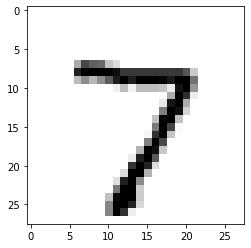

In [ ]:
# Fazendo nossas previsões

indice = 0

# Qual é o valor categórico em y_teste[indice]
print("Valor categórico em y_teste[indice]:", y_teste[indice])

#Se for um 7, irá exibir [0.0.0.0.0.0.0.1.0.0.]

#print(x_teste[indice])

imagem = x_teste[indice].reshape((1,resolucao_total))

#Fazendo a previsão

prediction = model.predict(imagem)
print("previsão;", prediction)

#prediction_class = model.predict_classes(imagem)
import numpy as np
prediction_class = np.argmax(model.predict(imagem), axis= -1)
print("previsão ajustada:", prediction_class)

#apenas para visualizar a imagem
(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary) 